<a href="https://colab.research.google.com/github/Haikal7090/TUBES-LIDEA-7/blob/main/TUBES_LIDEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DEPENDECIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

# **LOAD DATA**

In [2]:
!pip install gdown
!gdown --fuzzy "https://docs.google.com/spreadsheets/d/1mhDBGeIt2b6-FFKrolccp6Jog7ZvhrZN/edit?usp=sharing&ouid=116842443111305752575&rtpof=true&sd=true"

Downloading...
From: https://drive.google.com/uc?id=1mhDBGeIt2b6-FFKrolccp6Jog7ZvhrZN
To: /content/1744774003471_Data_Tugas_Besar_FINAL.xlsx
100% 1.40M/1.40M [00:00<00:00, 118MB/s]


In [3]:
df = pd.read_excel("1744774003471_Data_Tugas_Besar_FINAL.xlsx")
df.head()

,NAME,DESCRIPTION,VALUE,UNITS,DATE_TIME,TAG,DATE_NO,Amount Comp_01
0,AA1,AA1_91_9500062414,0.0,Sm3/d,20210401,91_9500062414,44287,0.0
1,AA1,AA1_91_9500062414,0.0,Sm3/d,20210402,91_9500062414,44288,0.0
2,AA1,AA1_91_9500062414,0.0,Sm3/d,20210403,91_9500062414,44289,0.0
3,AA1,AA1_91_9500062414,0.0,Sm3/d,20210404,91_9500062414,44290,0.0
4,AA1,AA1_91_9500062414,0.0,Sm3/d,20210405,91_9500062414,44291,0.0


In [4]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35200 entries, 0 to 35199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NAME            35200 non-null  object        
 1   DESCRIPTION     35200 non-null  object        
 2   VALUE           35200 non-null  float64       
 3   UNITS           35200 non-null  object        
 4   DATE_TIME       35200 non-null  datetime64[ns]
 5   TAG             35200 non-null  object        
 6   DATE_NO         35200 non-null  int64         
 7   Amount Comp_01  35200 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.1+ MB


In [5]:
# Mengahapus kolom yang mirip yaitu kolom "DATE_TIME" dengan "DATE_NO" serta kolom kolom "VALUE" dengan "Anount Comp_01"
df.drop(columns=['DATE_NO'], inplace=True)
df.drop(columns=['Amount Comp_01'], inplace=True)


In [6]:
df.head()

,NAME,DESCRIPTION,VALUE,UNITS,DATE_TIME,TAG
0,AA1,AA1_91_9500062414,0.0,Sm3/d,2021-04-01,91_9500062414
1,AA1,AA1_91_9500062414,0.0,Sm3/d,2021-04-02,91_9500062414
2,AA1,AA1_91_9500062414,0.0,Sm3/d,2021-04-03,91_9500062414
3,AA1,AA1_91_9500062414,0.0,Sm3/d,2021-04-04,91_9500062414
4,AA1,AA1_91_9500062414,0.0,Sm3/d,2021-04-05,91_9500062414


In [ ]:
df["DATE_TIME"].duplicated().sum()

np.int64(34560)

# **EDA**

In [19]:
df.shape

(35200, 7)

In [20]:
print(df.describe())
print(f"Waktu Produksi : {df['DATE_TIME'].min()} sampai {df['DATE_TIME'].max()}")

              VALUE            DATE_TIME  VALUE_CAPPED
count  35200.000000                35200  35200.000000
mean     106.370341  2022-02-14 12:00:00    109.771769
min        0.000000  2021-04-01 00:00:00      0.000000
25%        8.600000  2021-09-07 18:00:00     14.300000
50%       36.700000  2022-02-14 12:00:00     38.400000
75%      227.470000  2022-07-24 06:00:00    227.800000
max      645.231250  2022-12-31 00:00:00    645.231250
std      126.943131                  NaN    125.791105
Waktu Produksi : 2021-04-01 00:00:00 sampai 2022-12-31 00:00:00


In [ ]:
df['NAME'].value_counts()

,count
NAME,
AA5,6898
AA1,6881
AA2,6855
AA3,6854
AA4,6836


In [ ]:
df['DESCRIPTION'].value_counts()

,count
DESCRIPTION,
AA1_91_EP_NATURAL_GAS,640
AA1_ANPR,640
AA1_ANTP,640
AA1_C_PR,640
AA1_C_OP,640
AA1_C_TE,640
AA1_FBHP,640
AA2_FBHT,640
AA1_FBHT,640


In [ ]:
df['DESCRIPTION'].unique()

array(['AA1_91_9500062414', 'AA1_91_EP_NATURAL_GAS', 'AA1_ANPR',
       'AA1_ANTP', 'AA1_C_OP', 'AA1_C_PR', 'AA1_C_TE', 'AA1_FBHP',
       'AA1_FBHT', 'AA1_FTHP', 'AA1_FTHT', 'AA2_91_9500062414',
       'AA2_91_EP_NATURAL_GAS', 'AA2_ANPR', 'AA2_ANTP', 'AA2_C_OP',
       'AA2_C_PR', 'AA2_C_TE', 'AA2_FBHP', 'AA2_FBHT', 'AA2_FTHP',
       'AA2_FTHT', 'AA3_91_9500062414', 'AA3_91_EP_NATURAL_GAS',
       'AA3_ANPR', 'AA3_ANTP', 'AA3_C_OP', 'AA3_C_PR', 'AA3_C_TE',
       'AA3_FBHP', 'AA3_FBHT', 'AA3_FTHP', 'AA3_FTHT',
       'AA4_91_9500062414', 'AA4_91_EP_NATURAL_GAS', 'AA4_ANPR',
       'AA4_ANTP', 'AA4_C_OP', 'AA4_C_PR', 'AA4_C_TE', 'AA4_FBHP',
       'AA4_FBHT', 'AA4_FTHP', 'AA4_FTHT', 'AA5_91_9500062414',
       'AA5_91_EP_NATURAL_GAS', 'AA5_ANPR', 'AA5_ANTP', 'AA5_C_OP',
       'AA5_C_PR', 'AA5_C_TE', 'AA5_FBHP', 'AA5_FBHT', 'AA5_FTHP',
       'AA5_FTHT'], dtype=object)

In [ ]:
df['DESCRIPTION'].nunique()

55

In [ ]:
df['UNITS'].value_counts()

,count
UNITS,
bara,12800
°C,12800
%,3200
MMSCMD,3193
Sm3/d,2331


In [ ]:
df['TAG'].value_counts()

,count
TAG,
ANPR,3200
C_OP,3200
ANTP,3200
FBHP,3200
FBHT,3200
C_PR,3200
C_TE,3200
FTHP,3200
FTHT,3200


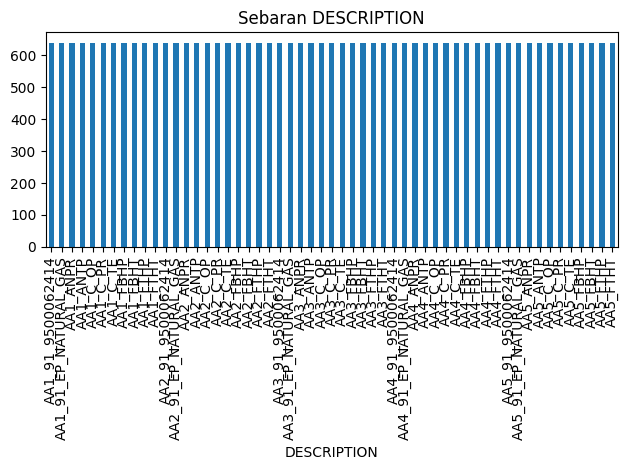

In [ ]:
df['DESCRIPTION'].value_counts().plot(kind='bar', title='Sebaran DESCRIPTION')
plt.tight_layout()
plt.show()

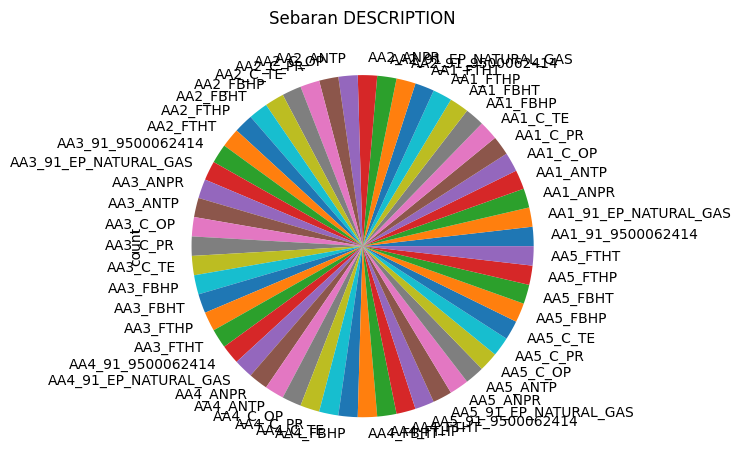

In [ ]:
df['DESCRIPTION'].value_counts().plot(kind='pie', title='Sebaran DESCRIPTION')
plt.tight_layout()
plt.show()

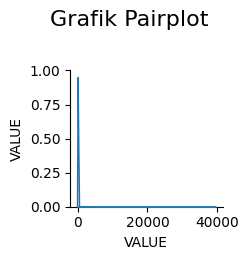

In [ ]:
pairplot = sns.pairplot(data=df, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
pairplot.fig.suptitle("Grafik Pairplot", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

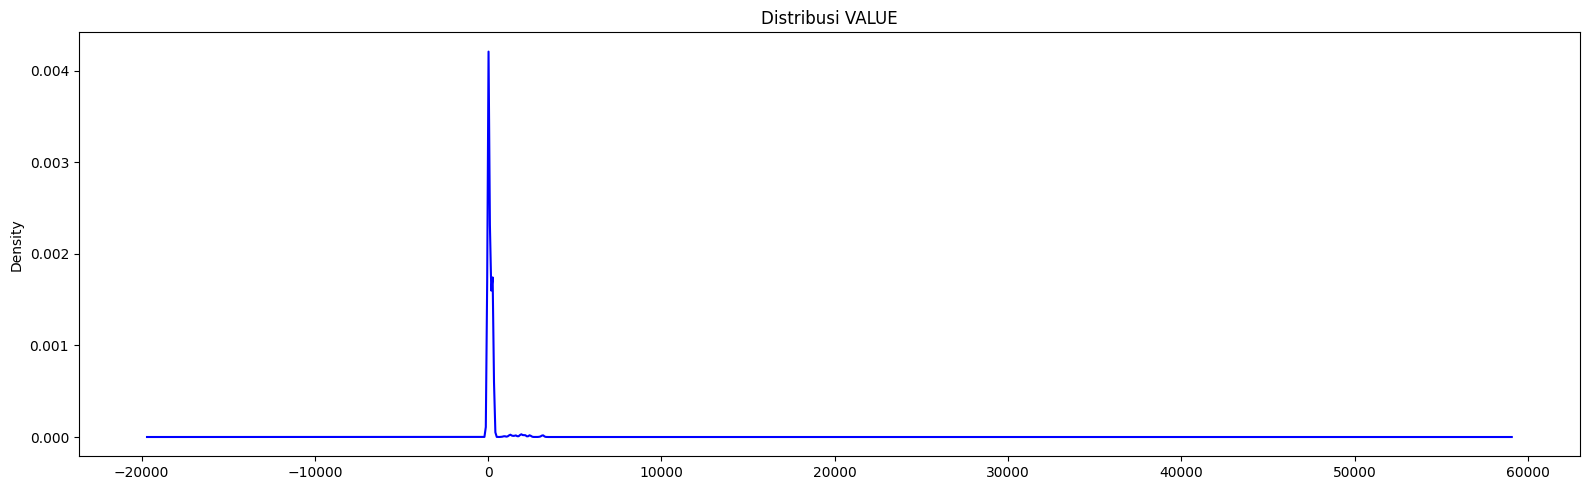

In [ ]:
# Plot KDE for Oil_Production and Gas_Production
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))

# Directly plot on the single ax object

df["VALUE"].plot(kind='kde', ax=ax, color='blue', title=f'Distribusi {column}')

plt.tight_layout()
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr(method='spearman')
print(correlation_matrix)

                VALUE  Amount Comp_01
VALUE             1.0             1.0
Amount Comp_01    1.0             1.0


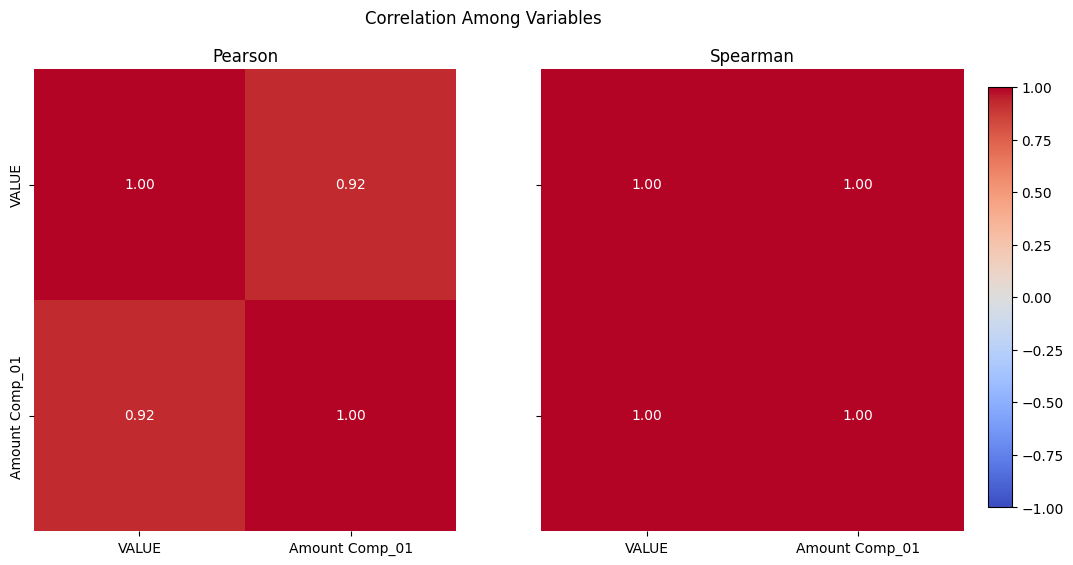

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
annot = True
fmt = '.2f'
cmap = 'coolwarm'

sns.heatmap(numeric_df.corr(method='pearson'), annot=annot, vmin=-1, vmax=1, fmt=fmt, cmap=cmap, ax=ax[0], cbar=False)
sns.heatmap(numeric_df.corr(method='spearman'), annot=annot, vmin=-1, vmax=1, fmt=fmt, cmap=cmap, ax=ax[1], cbar=False)

ax[0].set_title('Pearson')
ax[1].set_title('Spearman')
fig.suptitle('Correlation Among Variables')
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust position and size as needed
fig.colorbar(ax[0].get_children()[0], cax=cbar_ax, orientation='vertical')

plt.show()

Unique wells: ['AA1' 'AA2' 'AA3' 'AA4' 'AA5']
Well counts:
NAME
AA5    6898
AA1    6881
AA2    6855
AA3    6854
AA4    6836
Name: count, dtype: int64


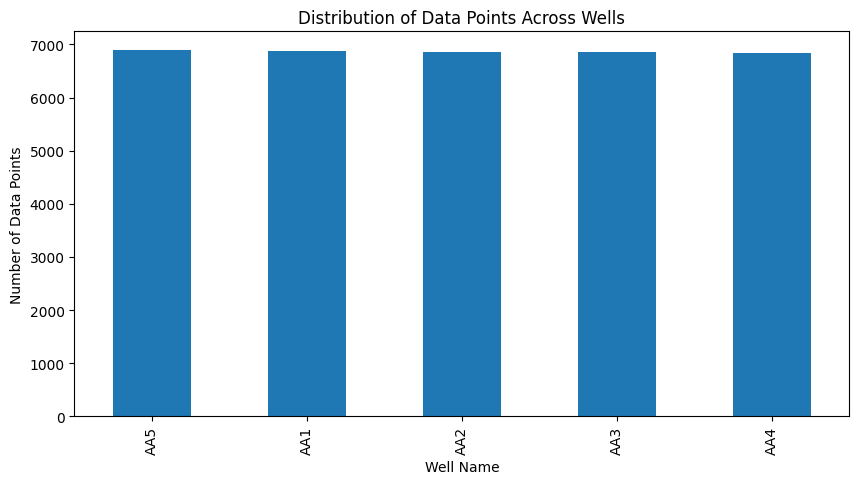

In [ ]:
# Analyze the 'NAME' column
unique_wells = df['NAME'].unique()
print(f"Unique wells: {unique_wells}")
well_counts = df['NAME'].value_counts()
print(f"Well counts:\n{well_counts}")
plt.figure(figsize=(10, 5))
well_counts.plot(kind='bar')
plt.title('Distribution of Data Points Across Wells')
plt.xlabel('Well Name')
plt.ylabel('Number of Data Points')
plt.show()

In [ ]:
# Filter baris yang hanya berisi 'AA1_91_9500062414' pada kolom 'NAME'
df_AA1_water = df.loc[df['DESCRIPTION'] == 'AA1_91_9500062414']

df_AA1_water.tail()

df_AA1_water.shape

(640, 6)

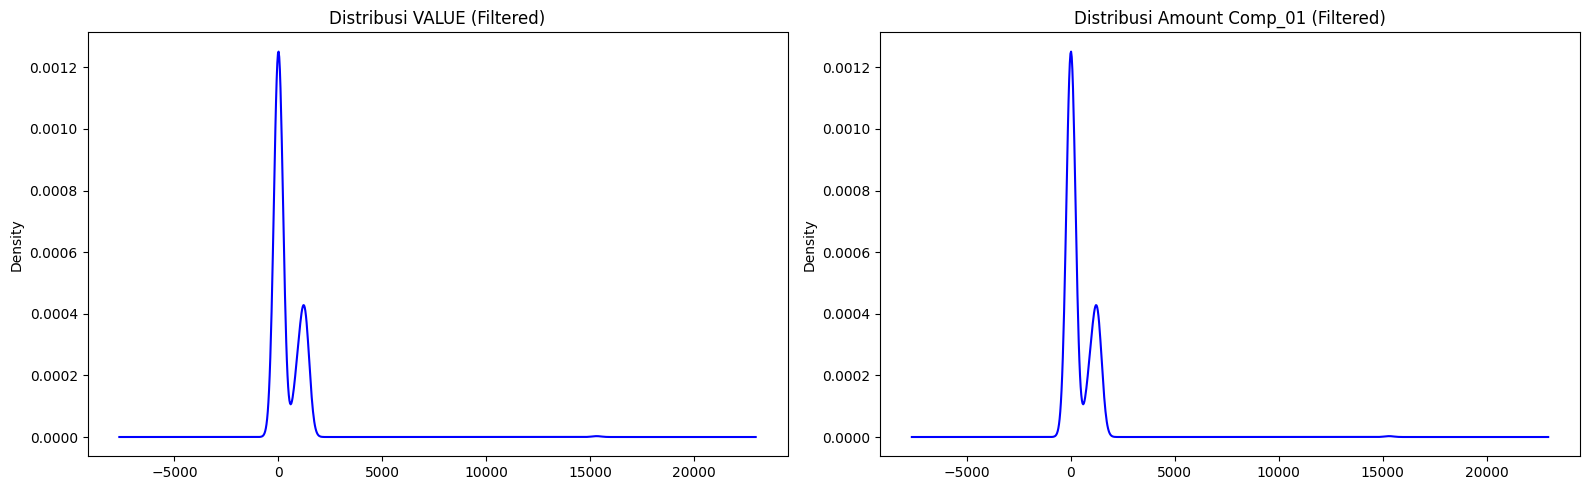

In [ ]:
# prompt: buat grafik distribusi untuk filtered_df

# Plot KDE for VALUE and Amount Comp_01 in filtered_df
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for axes, column in zip(ax, ["VALUE","Amount Comp_01"]):
    df_AA1_water[column].plot(kind='kde', ax=axes, color='blue', title=f'Distribusi {column} (Filtered)')

plt.tight_layout()
plt.show()


In [ ]:
df_AA1_water.replace(0, np.nan, inplace=True)

missing_percentage = df_AA1_water.isnull().sum() / len(df_AA1_water) * 100
missing_percentage

<ipython-input-18-fce1088afec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AA1_water.replace(0, np.nan, inplace=True)


,0
NAME,0.000
DESCRIPTION,0.000
VALUE,24.375
UNITS,0.000
DATE_TIME,0.000
TAG,0.000


In [ ]:
for column in df_AA1_water.columns:
    if missing_percentage[column] == 0:
        # Tidak ada missing values, lanjutkan
        continue
    elif missing_percentage[column] <= 5:
        # Jika missing values <= 5%, isi dengan mean (untuk numerik) atau modus (untuk kategorikal)
        if df_AA1_water[column].dtype in [np.float64, np.int64]:  # Kolom numerik
            df_AA1_water[column].fillna(df_AA1_water[column].mean(), inplace=True)
        else:  # Kolom kategorikal
            df_AA1_water[column].fillna(df[column].mode()[0], inplace=True)
    elif missing_percentage[column] <= 30:
        # Jika missing values antara 5% dan 30%, isi dengan median (untuk numerik) atau modus (untuk kategorikal)
        if df_AA1_water[column].dtype in [np.float64, np.int64]:  # Kolom numerik
            df_AA1_water[column].fillna(df_AA1_water[column].median(), inplace=True)
        else:  # Kolom kategorikal
            df_AA1_water[column].fillna(df_AA1_water[column].mode()[0], inplace=True)
    else:
        # Jika missing values > 30%, hapus kolom
        df_AA1_water.drop(columns=[column], inplace=True)

# Tampilkan hasil setelah pengisian
print("Data setelah mengisi nilai yang hilang:")
print(df_AA1_water.head())

Data setelah mengisi nilai yang hilang:
  NAME        DESCRIPTION  VALUE  UNITS  DATE_TIME            TAG  DATE_NO  \
0  AA1  AA1_91_9500062414   1.32  Sm3/d   20210401  91_9500062414    44287   
1  AA1  AA1_91_9500062414   1.32  Sm3/d   20210402  91_9500062414    44288   
2  AA1  AA1_91_9500062414   1.32  Sm3/d   20210403  91_9500062414    44289   
3  AA1  AA1_91_9500062414   1.32  Sm3/d   20210404  91_9500062414    44290   
4  AA1  AA1_91_9500062414   1.32  Sm3/d   20210405  91_9500062414    44291   

   Amount Comp_01  
0            1.32  
1            1.32  
2            1.32  
3            1.32  
4            1.32  


<ipython-input-13-1113ff93f06a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_AA1_water[column].fillna(df_AA1_water[column].median(), inplace=True)
<ipython-input-13-1113ff93f06a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AA1_water[column].fillna(df_AA1_water[column].median(), inplace=True)


In [ ]:
missing_percentage

,0
NAME,0.0
DESCRIPTION,0.0
VALUE,0.0
UNITS,0.0
DATE_TIME,0.0
TAG,0.0
DATE_NO,0.0
Amount Comp_01,0.0


In [ ]:
df.columns

Index(['NAME', 'DESCRIPTION', 'VALUE', 'UNITS', 'DATE_TIME', 'TAG',
       'Amount Comp_01'],
      dtype='object')

In [ ]:
df_raw = df.copy()
df_raw.replace(0, np.nan, inplace=True)

missing_percentage = df_raw.isnull().sum() / len(df_raw) * 100
missing_percentage

,0
NAME,0.000000
DESCRIPTION,0.000000
VALUE,6.511364
UNITS,0.000000
DATE_TIME,0.000000
TAG,0.000000


# **DATA CLEANING**


In [ ]:
df.isna().sum()

,0
NAME,0
DESCRIPTION,0
VALUE,0
UNITS,0
DATE_TIME,0
TAG,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Menghapus nilai duplikat
df.drop_duplicates(inplace=True)

In [ ]:
# Mengecek Persentase Missing Value Tiap Kolom
columns = df.columns
for col in columns:
    missing_percent = df[col].isnull().mean() * 100
    print(f"Persentase Missing Value {col}: {missing_percent:.2f}%")

Persentase Missing Value NAME: 0.00%
Persentase Missing Value DESCRIPTION: 0.00%
Persentase Missing Value VALUE: 0.00%
Persentase Missing Value UNITS: 0.00%
Persentase Missing Value DATE_TIME: 0.00%
Persentase Missing Value TAG: 0.00%


In [ ]:
df.columns

Index(['NAME', 'DESCRIPTION', 'VALUE', 'UNITS', 'DATE_TIME', 'TAG'], dtype='object')

In [ ]:
# Hitung Z-score untuk setiap kolom
numeric_df = df.select_dtypes(include=np.number)
z_scores = numeric_df.apply(zscore)  # Hitung Z-score untuk setiap kolom

# Mask untuk mendeteksi outlier (Z-score > 3 atau Z-score < -3)
outlier_mask = np.abs(z_scores) > 3

# Hitung jumlah outlier untuk setiap kolom
outlier_counts = {}
for column in numeric_df:
    outlier_counts[column] = outlier_mask[column].sum()  # Hitung jumlah True (outlier)

# Tampilkan hasil
outlier_counts

{'VALUE': np.int64(710)}

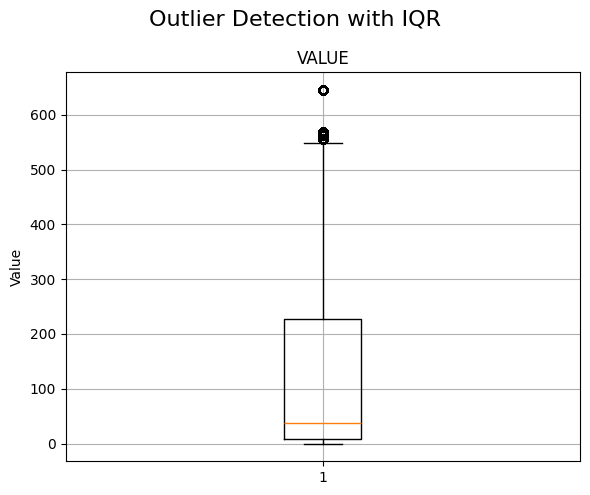

In [ ]:
# --- Visualisasi Boxplot untuk Validasi Outlier ---

# Membuat subplots
fig, ax = plt.subplots(1, 1, figsize=(6, 5))  # Create a single subplot

# Create the boxplot for the 'VALUE' column
ax.boxplot(df['VALUE'].dropna())  # Drop NaN before making boxplot
ax.set_title('VALUE')  # Set the title
ax.set_ylabel('Value')  # Label the y-axis
ax.grid(True)  # Add grid

# Set layout
plt.suptitle('Outlier Detection with IQR', fontsize=16)  # Main title
plt.tight_layout()  # Adjust layout
plt.show()

In [8]:
for well in df['NAME'].unique():
    well_data = df[df['NAME'] == well]
    Q1 = well_data['VALUE'].quantile(0.25)
    Q3 = well_data['VALUE'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df['NAME'] == well) & ((df['VALUE'] < lower_bound) | (df['VALUE'] > upper_bound)), 'VALUE'] = df.loc[(df['NAME'] == well) & (df['VALUE'] > upper_bound), 'VALUE'].apply(lambda x: upper_bound if x > upper_bound else x)
    df.loc[(df['NAME'] == well) & ((df['VALUE'] < lower_bound) | (df['VALUE'] > upper_bound)), 'VALUE'] = df.loc[(df['NAME'] == well) & (df['VALUE'] < lower_bound), 'VALUE'].apply(lambda x: lower_bound if x < lower_bound else x)

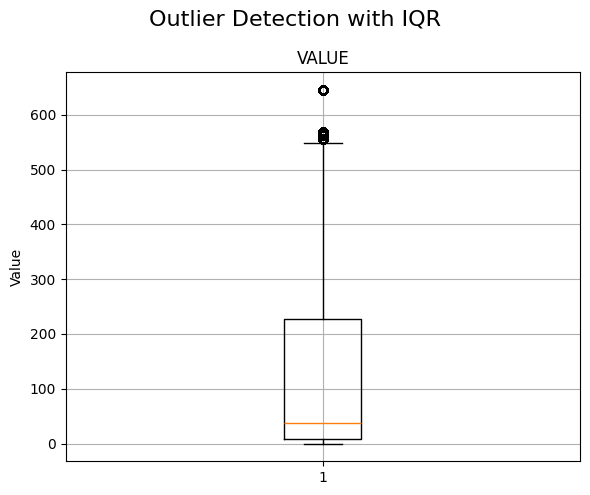

In [ ]:
# --- Visualisasi Boxplot untuk Validasi Outlier ---

# Membuat subplots - create a number of subplots equal to the number of numeric columns
num_cols = len(numeric_df.columns)
# Adjust the figure size based on the number of columns to avoid overcrowding
fig, axes = plt.subplots(1, num_cols, figsize=(num_cols * 6, 5))

# If there's only one numeric column, axes is a single Axes object, not an array
# Handle this case by making axes iterable (e.g., a list containing the single object)
if num_cols == 1:
    axes = [axes]

# Loop setiap kolom dan buat boxplot-nya
for i, col in enumerate(numeric_df):
    axes[i].boxplot(df[col].dropna())  # Drop NaN sebelum membuat boxplot
    axes[i].set_title(col)  # Set judul masing-masing subplot
    axes[i].set_ylabel('Value')  # Label sumbu y
    axes[i].grid(True)  # Tambahkan grid

# Set layout agar tidak overlapping
plt.suptitle('Outlier Detection with IQR', fontsize=16)  # Judul utama
plt.tight_layout()  # Atur layout agar pas dengan judul
plt.show()

In [ ]:
lower_bound

np.float64(-331.38374999999996)

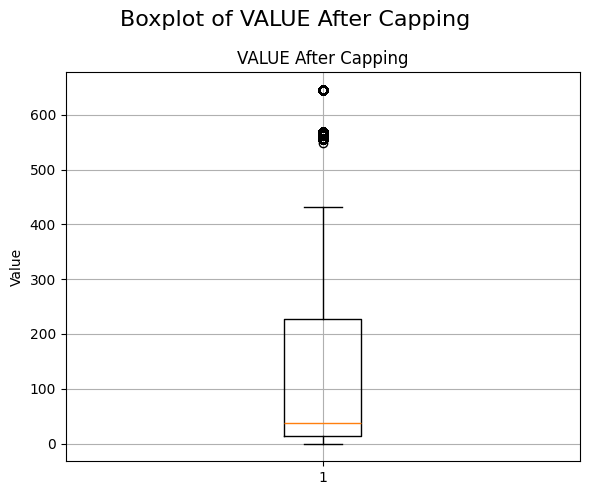


Boxplot untuk kolom 'VALUE' setelah capping ditampilkan di atas.


In [17]:
# prompt: Buatkan aku kode yang dapat mengganti nilai outliers cara capping, buatkan capping dengan hasil dari cek outlier dari gabungan kolom 'VALUE' dan 'DESCRIPTION' jika susah coba gunaka pivot, hanya tampilkan boxplot dari kolom 'VALUE' saja karena kebanyakan,
# Noted : Buatkan aku agar nilai yang ada di outlier atas menjadi di upper_bound dan sebaliknya. Metode ini dikenal dengan capping

# Menggabungkan kolom 'VALUE' dan 'DESCRIPTION' untuk analisis outlier (meskipun capping hanya akan diterapkan pada 'VALUE')
# Kita bisa menganggap kombinasi 'DESCRIPTION' dan 'NAME' (well) sebagai grup untuk menganalisis outlier pada 'VALUE'
# Metode pivot tidak secara langsung digunakan untuk mendeteksi outlier, tetapi pengelompokan data
# berdasarkan 'DESCRIPTION' dan 'NAME' adalah pendekatan yang masuk akal.

# Buat salinan data untuk capping agar data asli tetap utuh
df_capped = df.copy()

# Iterasi melalui setiap kombinasi unik dari 'NAME' (well) dan 'DESCRIPTION'
for name, description in df_capped[['NAME', 'DESCRIPTION']].drop_duplicates().values:
    # Filter data untuk kombinasi 'NAME' dan 'DESCRIPTION' saat ini
    condition = (df_capped['NAME'] == name) & (df_capped['DESCRIPTION'] == description)
    subset_df = df_capped.loc[condition, 'VALUE']

    # Hitung Q1, Q3, dan IQR untuk subset data ini
    Q1 = subset_df.quantile(0.25)
    Q3 = subset_df.quantile(0.75)
    IQR = Q3 - Q1

    # Hitung batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Terapkan capping pada kolom 'VALUE' untuk subset data ini
    # Ganti nilai di atas upper_bound dengan upper_bound
    df_capped.loc[condition, 'VALUE'] = df_capped.loc[condition, 'VALUE'].apply(lambda x: upper_bound if x > upper_bound else x)
    # Ganti nilai di bawah lower_bound dengan lower_bound
    df_capped.loc[condition, 'VALUE'] = df_capped.loc[condition, 'VALUE'].apply(lambda x: lower_bound if x < lower_bound else x)


# --- Visualisasi Boxplot setelah Capping untuk Validasi ---

# Membuat subplots - hanya untuk kolom 'VALUE' seperti permintaan
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Create the boxplot for the 'VALUE' column after capping
ax.boxplot(df_capped['VALUE'].dropna())  # Drop NaN before making boxplot
ax.set_title('VALUE After Capping')  # Set the title
ax.set_ylabel('Value')  # Label the y-axis
ax.grid(True)  # Add grid

# Set layout
plt.suptitle('Boxplot of VALUE After Capping', fontsize=16)  # Main title
plt.tight_layout()  # Adjust layout
plt.show()

print("\nBoxplot untuk kolom 'VALUE' setelah capping ditampilkan di atas.")


In [25]:
# prompt: Buatkan aku kode yang dapat menghapus nilai outliers berdasarkan hasil dari cek outlier dari gabungan kolom 'VALUE' dan 'DESCRIPTION' jika susah coba gunaka pivot, hanya tampilkan boxplot dari kolom 'VALUE' saja karena kebanyakan,

# Visualisasi Boxplot setelah Capping untuk Validasi - hanya untuk kolom 'VALUE'
plt.figure(figsize=(6, 5))  # Ukuran figure tunggal
plt.boxplot(df_capped['VALUE'].dropna())  # Buat boxplot untuk kolom 'VALUE' setelah capping
plt.title('VALUE After Capping')  # Judul boxplot
plt.ylabel('Value')  # Label sumbu y
plt.grid(True)  # Tambahkan grid
plt.suptitle('Boxplot of VALUE After Capping', fontsize=16) # Judul utama
plt.tight_layout() # Atur layout
plt.show()

print("\nBoxplot untuk kolom 'VALUE' setelah capping ditampilkan di atas.")


In [ ]:
upper_bound

np.float64(568.30625)

In [18]:
df[(df['VALUE'] < lower_bound) | (df['VALUE'] > upper_bound)].shape

(34323, 7)

In [21]:
df_raw = df.copy()
df_raw.replace(0, np.nan, inplace=True)


In [22]:
# Calculate the percentage of missing values per DESCRIPTION
# Apply isnull() to the 'VALUE' column first, then group by 'DESCRIPTION' and sum the True values (missing values)
missing_counts = df_raw['VALUE'].isnull().groupby(df_raw['DESCRIPTION']).sum()

# Calculate the total count for each description in the original df_raw
total_counts = df_raw['DESCRIPTION'].value_counts()

# Calculate the missing percentage by dividing the missing counts by the total counts
missing_pct = (missing_counts / total_counts) * 100

print(missing_pct)

DESCRIPTION
AA1_91_9500062414        24.37500
AA1_91_EP_NATURAL_GAS     9.53125
AA1_ANPR                  4.06250
AA1_ANTP                  4.06250
AA1_C_OP                 10.31250
AA1_C_PR                  4.06250
AA1_C_TE                  4.21875
AA1_FBHP                  4.06250
AA1_FBHT                  4.06250
AA1_FTHP                  4.06250
AA1_FTHT                  4.06250
AA2_91_9500062414        24.68750
AA2_91_EP_NATURAL_GAS     6.71875
AA2_ANPR                  3.90625
AA2_ANTP                  3.90625
AA2_C_OP                  7.03125
AA2_C_PR                  3.90625
AA2_C_TE                  3.90625
AA2_FBHP                  3.90625
AA2_FBHT                  3.90625
AA2_FTHP                  3.90625
AA2_FTHT                  3.90625
AA3_91_9500062414        23.90625
AA3_91_EP_NATURAL_GAS     5.93750
AA3_ANPR                  4.21875
AA3_ANTP                  4.21875
AA3_C_OP                  6.71875
AA3_C_PR                  4.21875
AA3_C_TE                  4.21875
AA

In [23]:
# prompt: DESCRIPTION
# AA1_91_9500062414        24.37500
# AA1_91_EP_NATURAL_GAS     9.53125
# AA1_ANPR                  4.06250
# AA1_ANTP                  4.06250
# AA1_C_OP                 10.31250
# AA1_C_PR                  4.06250
# AA1_C_TE                  4.21875
# AA1_FBHP                  4.06250
# AA1_FBHT                  4.06250
# AA1_FTHP                  4.06250
# AA1_FTHT                  4.06250
# AA2_91_9500062414        24.68750
# AA2_91_EP_NATURAL_GAS     6.71875
# AA2_ANPR                  3.90625
# AA2_ANTP                  3.90625
# AA2_C_OP                  7.03125
# AA2_C_PR                  3.90625
# AA2_C_TE                  3.90625
# AA2_FBHP                  3.90625
# AA2_FBHT                  3.90625
# AA2_FTHP                  3.90625
# AA2_FTHT                  3.90625
# AA3_91_9500062414        23.90625
# AA3_91_EP_NATURAL_GAS     5.93750
# AA3_ANPR                  4.21875AA5_C_PR
# .................                   ...............
# AA5_C_TE                  4.06250
# AA5_FBHP                  4.06250
# AA5_FBHT                  4.06250
# AA5_FTHP                  4.06250
# AA5_FTHT                  4.06250
# Buatkan aku kode python yang dapat mengisi nila kosong value berdasarkan logika percebangan dari hasil cek missing value data di atas dari gabungan kolom value dan description dimana aturannya <= 5 maka isi dengan mean, kurang daru <= 30 isi median, lebih dari 30 berarti dihapus
# hubungakan atau lanjutkan dari kode dibawah
# # Calculate the percentage of missing values per DESCRIPTION
# # Apply isnull() to the 'VALUE' column first, then group by 'DESCRIPTION' and sum the True values (missing values)
# missing_counts = df_raw['VALUE'].isnull().groupby(df_raw['DESCRIPTION']).sum()
# # Calculate the total count for each description in the original df_raw
# total_counts = df_raw['DESCRIPTION'].value_counts()
# # Calculate the missing percentage by dividing the missing counts by the total counts
# missing_pct = (missing_counts / total_counts) * 100
# print(missing_pct)

# Iterasi melalui setiap DESCRIPTION unik
for description, percent_missing in missing_pct.items():
    # Filter dataframe untuk DESCRIPTION saat ini
    df_desc = df_raw[df_raw['DESCRIPTION'] == description]

    if percent_missing <= 5:
        # Isi missing values dengan mean jika <= 5%
        mean_value = df_desc['VALUE'].mean()
        df_raw.loc[df_raw['DESCRIPTION'] == description, 'VALUE'] = df_raw.loc[df_raw['DESCRIPTION'] == description, 'VALUE'].fillna(mean_value)
        print(f"Filled missing values for '{description}' with mean: {mean_value:.2f}")
    elif percent_missing <= 30:
        # Isi missing values dengan median jika > 5% dan <= 30%
        median_value = df_desc['VALUE'].median()
        df_raw.loc[df_raw['DESCRIPTION'] == description, 'VALUE'] = df_raw.loc[df_raw['DESCRIPTION'] == description, 'VALUE'].fillna(median_value)
        print(f"Filled missing values for '{description}' with median: {median_value:.2f}")
    else:
        # Hapus baris dengan missing value jika > 30%
        initial_rows = len(df_raw)
        df_raw.dropna(subset=['VALUE'], inplace=True)
        removed_rows = initial_rows - len(df_raw)
        print(f"Removed {removed_rows} rows with missing values for '{description}' (> 30% missing)")

# Verifikasi setelah pengisian/penghapusan
missing_percentage_after = df_raw.isnull().sum() / len(df_raw) * 100
print("\nMissing percentages after handling:")
missing_percentage_after

Filled missing values for 'AA1_91_9500062414' with median: 1.32
Filled missing values for 'AA1_91_EP_NATURAL_GAS' with median: 0.73
Filled missing values for 'AA1_ANPR' with mean: 237.10
Filled missing values for 'AA1_ANTP' with mean: 7.22
Filled missing values for 'AA1_C_OP' with median: 21.15
Filled missing values for 'AA1_C_PR' with mean: 152.82
Filled missing values for 'AA1_C_TE' with mean: 18.14
Filled missing values for 'AA1_FBHP' with mean: 242.97
Filled missing values for 'AA1_FBHT' with mean: 37.97
Filled missing values for 'AA1_FTHP' with mean: 228.24
Filled missing values for 'AA1_FTHT' with mean: 22.72
Filled missing values for 'AA2_91_9500062414' with median: 1.95
Filled missing values for 'AA2_91_EP_NATURAL_GAS' with median: 1.10
Filled missing values for 'AA2_ANPR' with mean: 249.49
Filled missing values for 'AA2_ANTP' with mean: 6.45
Filled missing values for 'AA2_C_OP' with median: 30.10
Filled missing values for 'AA2_C_PR' with mean: 154.29
Filled missing values for 

,0
NAME,0.000000
DESCRIPTION,0.000000
VALUE,0.000000
UNITS,0.000000
DATE_TIME,0.000000
TAG,0.000000
VALUE_CAPPED,2.207386


DESCRIPTION  DATE_TIME  AA1_91_9500062414  AA1_91_EP_NATURAL_GAS  AA1_ANPR  \
0           2021-04-01                0.0                    0.0       0.0   
1           2021-04-02                0.0                    0.0       0.0   
2           2021-04-03                0.0                    0.0       0.0   
3           2021-04-04                0.0                    0.0       0.0   
4           2021-04-05                0.0                    0.0       0.0   

DESCRIPTION  AA1_ANTP  AA1_C_OP  AA1_C_PR  AA1_C_TE  AA1_FBHP  AA1_FBHT  ...  \
0                 0.0       0.0       0.0       0.0       0.0       0.0  ...   
1                 0.0       0.0       0.0       0.0       0.0       0.0  ...   
2                 0.0       0.0       0.0       0.0       0.0       0.0  ...   
3                 0.0       0.0       0.0       0.0       0.0       0.0  ...   
4                 0.0       0.0       0.0       0.0       0.0       0.0  ...   

DESCRIPTION  AA5_91_EP_NATURAL_GAS  AA5_ANPR  AA5_

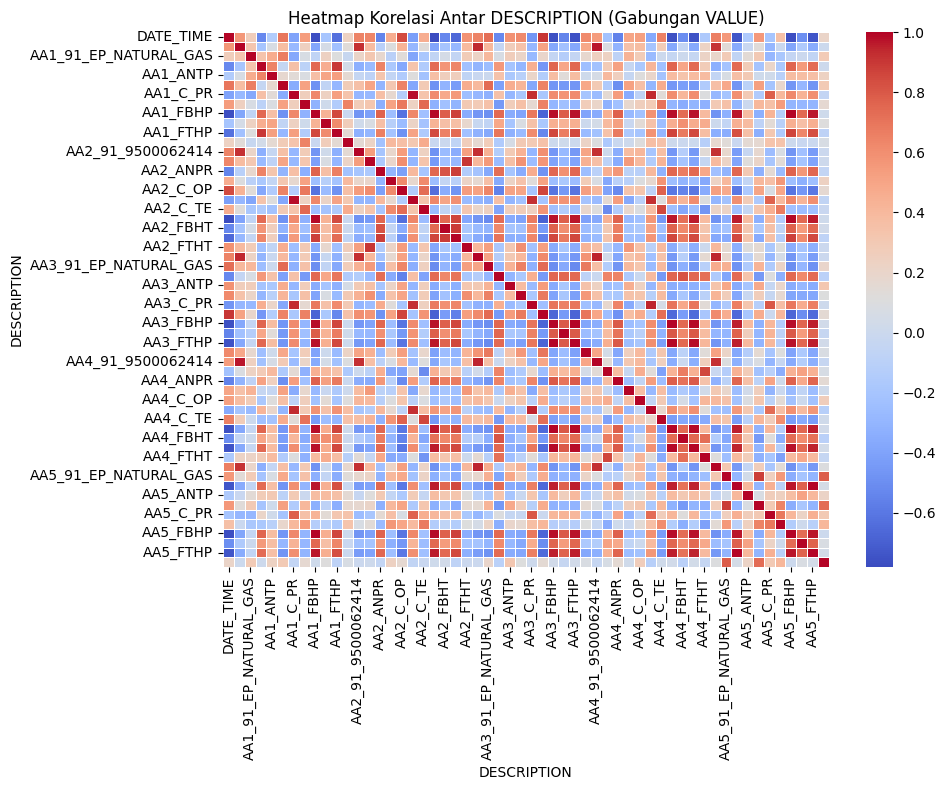

In [24]:
# prompt: Buatkan aku kode yang dapat membuat grafik yang menunjukkan hubungan dari kolom unik description yang digabung dengan nilai value yang sudah bersih, buatkan grafik pairplot, korelasi dari nilai gabungan antara value dan description
# dibuat ke dalam bentuk lain yakni ke pairplot dan heatmap antara nilai description dan gabungan value  coba menggunakan syntax pivot

# Buat pivot table untuk menggabungkan nilai VALUE berdasarkan DESCRIPTION
df_pivot = df.pivot_table(values='VALUE', index='DATE_TIME', columns='DESCRIPTION', aggfunc='mean')

# Reset index agar DESCRIPTION menjadi kolom
df_pivot = df_pivot.reset_index()

# Tampilkan hasil pivot table
print(df_pivot.head())

# Hitung korelasi antar kolom DESCRIPTION berdasarkan gabungan nilai VALUE
correlation_pivot = df_pivot.corr(method='spearman')

# Tampilkan matriks korelasi
print("\nMatriks Korelasi antara DESCRIPTION berdasarkan gabungan VALUE:")
print(correlation_pivot)

# # Buat pairplot dari data pivot
# sns.pairplot(df_pivot.drop(columns=['DATE_TIME']).dropna(), kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
# plt.suptitle("Grafik Pairplot Antar DESCRIPTION (Gabungan VALUE)", fontsize=16, y=1.02)
# plt.tight_layout()
# plt.show()

# Buat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pivot, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar DESCRIPTION (Gabungan VALUE)')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: Buatkan aku model machine learning menggunakan algoritma yang sesuai dan paling cocok dengan fitur 'AA1_91_9500062414', 'AA1_ANPR', 'AA1_ANTP', 'AA1_C_OP', 'AA1_C_PR', 'AA1_C_TE', 'AA1_FBHP', 'AA1_FBHT', 'AA1_FTHP', 'AA1_FTHT', 'AA2_91_9500062414', 'AA2_ANPR', 'AA2_ANTP', 'AA2_C_OP', 'AA2_C_PR', 'AA2_C_TE', 'AA2_FBHP', 'AA2_FBHT', 'AA2_FTHP', 'AA2_FTHT', 'AA3_91_9500062414', 'AA3_ANPR', 'AA3_ANTP', 'AA3_C_OP', 'AA3_C_PR', 'AA3_C_TE', 'AA3_FBHP', 'AA3_FBHT', 'AA3_FTHP', 'AA3_FTHT', 'AA4_91_9500062414', 'AA4_ANPR', 'AA4_ANTP', 'AA4_C_OP', 'AA4_C_PR', 'AA4_C_TE', 'AA4_FBHP', 'AA4_FBHT', 'AA4_FTHP', 'AA4_FTHT', 'AA5_91_9500062414', 'AA5_ANPR', 'AA5_ANTP', 'AA5_C_OP', 'AA5_C_PR', 'AA5_C_TE', 'AA5_FBHP', 'AA5_FBHT', 'AA5_FTHP', 'AA5_FTHT' dengan target 'AA1_91_EP_NATURAL_GAS', 'AA2_91_EP_NATURAL_GAS', 'AA3_91_EP_NATURAL_GAS', 'AA4_91_EP_NATURAL_GAS', dan 'AA5_91_EP_NATURAL_GAS',
# output dari model ini dapat memprediksi gas produksi dari kelima sumur produksi gas

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Define the features and targets
features = ['AA1_91_9500062414', 'AA1_ANPR', 'AA1_ANTP', 'AA1_C_OP', 'AA1_C_PR', 'AA1_C_TE', 'AA1_FBHP', 'AA1_FBHT', 'AA1_FTHP', 'AA1_FTHT', 'AA2_91_9500062414', 'AA2_ANPR', 'AA2_ANTP', 'AA2_C_OP', 'AA2_C_PR', 'AA2_C_TE', 'AA2_FBHP', 'AA2_FBHT', 'AA2_FTHP', 'AA2_FTHT', 'AA3_91_9500062414', 'AA3_ANPR', 'AA3_ANTP', 'AA3_C_OP', 'AA3_C_PR', 'AA3_C_TE', 'AA3_FBHP', 'AA3_FBHT', 'AA3_FTHP', 'AA3_FTHT', 'AA4_91_9500062414', 'AA4_ANPR', 'AA4_ANTP', 'AA4_C_OP', 'AA4_C_PR', 'AA4_C_TE', 'AA4_FBHP', 'AA4_FBHT', 'AA4_FTHP', 'AA4_FTHT', 'AA5_91_9500062414', 'AA5_ANPR', 'AA5_ANTP', 'AA5_C_OP', 'AA5_C_PR', 'AA5_C_TE', 'AA5_FBHP', 'AA5_FBHT', 'AA5_FTHP', 'AA5_FTHT']
targets = ['AA1_91_EP_NATURAL_GAS', 'AA2_91_EP_NATURAL_GAS', 'AA3_91_EP_NATURAL_GAS', 'AA4_91_EP_NATURAL_GAS', 'AA5_91_EP_NATURAL_GAS']

# Reshape the dataframe based on DESCRIPTION
df_model = df.pivot_table(values='VALUE', index='DATE_TIME', columns='DESCRIPTION', aggfunc='mean')

# Ensure all required features and targets are in the pivoted dataframe
# If a feature or target is not present, it might need to be handled (e.g., dropped or imputed)
# based on domain knowledge. Here, we'll drop columns that are not features or targets.
all_required_cols = features + targets
existing_cols = [col for col in all_required_cols if col in df_model.columns]
df_model = df_model[existing_cols]

# Drop rows with any missing values after pivoting, as ML models generally don't handle NaNs
df_model.dropna(inplace=True)

# Separate features (X) and targets (y)
X = df_model[features]
y = df_model[targets]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features - important for many models, especially those sensitive to feature scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Choosing a Suitable Model**
# Given the task is to predict multiple continuous output variables (natural gas production from 5 wells)
# based on multiple input features, this is a multi-output regression problem.
#
# Suitable algorithms include:
# 1.  **MultiOutputRegressor with a base regressor:**
#     -   RandomForestRegressor: Good for non-linear relationships, handles feature interactions.
#     -   Gradient Boosting models (like XGBoost): Often provide high accuracy.
#     -   Linear Regression: Simple baseline, but might not capture complex relationships.
# 2.  **Neural Networks (specifically designed for multi-output regression):** Can model complex non-linearities.

# Given the complexity and potential non-linear relationships in production data,
# Ensemble methods like Random Forest and XGBoost are often good choices.
# We will start with MultiOutputRegressor using XGBoost as the base estimator due to its performance.

# **Build and Train the Multi-Output Regression Model (XGBoost)**
# Using MultiOutputRegressor to wrap an XGBoost regressor
multioutput_model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))

# Train the model
print("Training the MultiOutputRegressor model...")
multioutput_model.fit(X_train_scaled, y_train)
print("Training complete.")

# **Evaluate the Model**
# Make predictions on the test set
y_pred = multioutput_model.predict(X_test_scaled)

# Evaluate the model's performance for each output target
print("\nModel Evaluation:")
for i, target_col in enumerate(targets):
    mse = mean_squared_error(y_test[target_col], y_pred[:, i])
    r2 = r2_score(y_test[target_col], y_pred[:, i])
    print(f"  {target_col}:")
    print(f"    Mean Squared Error (MSE): {mse:.4f}")
    print(f"    R-squared (R2): {r2:.4f}")

# Overall evaluation (average or sum of metrics)
overall_mse = mean_squared_error(y_test, y_pred)
overall_r2 = r2_score(y_test, y_pred) # Note: R2 for multi-output is a bit different

print(f"\nOverall Mean Squared Error (MSE): {overall_mse:.4f}")
print(f"Overall R-squared (R2): {overall_r2:.4f}")

# **How to Use the Model for Prediction**
# You can use the trained `multioutput_model` to predict natural gas production for new data.
# Remember to scale the new data using the same scaler fitted on the training data.

# Example prediction on a single new data point (replace with your actual new data)
# new_data = pd.DataFrame([...] , columns=features) # Your new data as a DataFrame
# new_data_scaled = scaler.transform(new_data)
# predicted_production = multioutput_model.predict(new_data_scaled)
# print("\nPredicted Natural Gas Production for a new data point:")
# print(predicted_production) # This will output an array with predictions for each target



Training the MultiOutputRegressor model...
Training complete.

Model Evaluation:
  AA1_91_EP_NATURAL_GAS:
    Mean Squared Error (MSE): 0.0029
    R-squared (R2): 0.9339
  AA2_91_EP_NATURAL_GAS:
    Mean Squared Error (MSE): 12353.1424
    R-squared (R2): -1.5382
  AA3_91_EP_NATURAL_GAS:
    Mean Squared Error (MSE): 8845.6109
    R-squared (R2): -1.7549
  AA4_91_EP_NATURAL_GAS:
    Mean Squared Error (MSE): 1174.5446
    R-squared (R2): -14998.7421
  AA5_91_EP_NATURAL_GAS:
    Mean Squared Error (MSE): 7536.3826
    R-squared (R2): -2.0229

Overall Mean Squared Error (MSE): 5981.9365
Overall R-squared (R2): -3000.6250
